In [1]:
import csv
import pandas as pd

In [4]:
df= pd.read_csv("Final_Dataset_Filtered.csv",index_col=None, header=0, lineterminator='\n')
df

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (48,81,100,110) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_id,user_id_str,name,screen_name,location,user_description,url,entities,protected,followers_count,...,total_supply_y,count_y,num_owners_y,average_price_y,num_reports_y,market_cap_y,floor_price_y,is_collection_verified_y,is_subject_to_whitelist_y,collection_name_y
0,1091518642682875905,1091518642682875905,Jeoi Reqi,JeoiReqi,jeoireqi@protonmail.com,🧟 Art/Music/Cryptography 🧟\n'Bout That $ROT-Li...,https://t.co/nCedHLnVz1,{'url': {'urls': [{'url': 'https://t.co/nCedHL...,False,2077,...,2.633100e+04,2.633100e+04,1673,0.143551,0,2.896410e+02,0,True,False,Alpaca City
1,1091518642682875905,1091518642682875905,Jeoi Reqi,JeoiReqi,jeoireqi@protonmail.com,🧟 Art/Music/Cryptography 🧟\n'Bout That $ROT-Li...,https://t.co/nCedHLnVz1,{'url': {'urls': [{'url': 'https://t.co/nCedHL...,False,2077,...,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,False,False,JR NFTs V2
2,1091518642682875905,1091518642682875905,Jeoi Reqi,JeoiReqi,jeoireqi@protonmail.com,🧟 Art/Music/Cryptography 🧟\n'Bout That $ROT-Li...,https://t.co/nCedHLnVz1,{'url': {'urls': [{'url': 'https://t.co/nCedHL...,False,2077,...,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,False,False,JR NFTs V2
3,1091518642682875905,1091518642682875905,Jeoi Reqi,JeoiReqi,jeoireqi@protonmail.com,🧟 Art/Music/Cryptography 🧟\n'Bout That $ROT-Li...,https://t.co/nCedHLnVz1,{'url': {'urls': [{'url': 'https://t.co/nCedHL...,False,2077,...,4.238433e+16,4.238433e+16,132848,0.000041,382,3.827521e+15,0,True,False,Rarible
4,1290424042906935297,1290424042906935297,👑CK_Designs💯$RSR💎®️,CKDesigns7,Somewhere on a canvas,"Artist, NFT, & Graphics Designer.\nSupporter &...",https://t.co/FscobOydvf,{'url': {'urls': [{'url': 'https://t.co/FscobO...,False,496,...,4.238433e+16,4.238433e+16,132848,0.000041,382,3.827521e+15,0,True,False,Rarible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245154,635340954,635340954,Alde🅡son,Ell10tA1d3rs0n,NaN,“In a time of deceit telling the truth is a re...,NaN,{'description': {'urls': [{'url': 'https://t.c...,False,154,...,1.000000e+00,1.000000e+00,1,0.000000,0,0.000000e+00,0,False,False,Open Sea Musk
245155,635340954,635340954,Alde🅡son,Ell10tA1d3rs0n,NaN,“In a time of deceit telling the truth is a re...,NaN,{'description': {'urls': [{'url': 'https://t.c...,False,154,...,1.000000e+00,1.000000e+00,1,0.000000,0,0.000000e+00,0,False,False,Open Sea Musk
245156,109412199,109412199,LS Design Firm,lsdesignfirm,Southern California,LS Design Firm is an creative print and online...,https://t.co/JySiQwcfqJ,{'url': {'urls': [{'url': 'https://t.co/JySiQw...,False,86,...,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,False,False,Xperimental
245157,109412199,109412199,LS Design Firm,lsdesignfirm,Southern California,LS Design Firm is an creative print and online...,https://t.co/JySiQwcfqJ,{'url': {'urls': [{'url': 'https://t.co/JySiQw...,False,86,...,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,False,False,Xperimental


In [8]:
from datetime import datetime
from datetime import timedelta

df.loc[:, ('AssetCreationDate')] = pd.to_datetime(df.loc[:, ('AssetCreationDate')], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')

df['year'] = df['AssetCreationDate'].dt.year
df['month_asset'] = df['AssetCreationDate'].dt.month

In [9]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%dT%H:%M:%S.%f")
## Subtracting timezone to get time in GMT , current time was in IST 
df['date'] = df['date'] - timedelta(hours = 5, minutes = 30)

In [6]:
df_avg_assetView = df.groupby(['contract_address', 'token_id']).agg({'avg_selling_price':'mean', 'total_sales_y':'sum','avg_listing_price':'mean', 'followers_count':'sum', 'market_cap_x':'mean','total_supply_y':'mean','num_owners_y':'mean'})
df_avg_assetView

avg_selling_price  \
contract_address                           token_id                                                                
0x005c1cfc36e5ec711bcac7eddbde7898fb332b47 17200030021                                                  0.000000   
                                           17200030142                                                  0.000000   
0x005efb3633638dd0dd336ce671920bccb1ea82bd 18800130001                                              11768.125000   
0x0076b645920716be2ad8ecd41fdd6760bbb1124d 68300117821986932630745618477179704057395704274...           0.000000   
0x00c719960bfcb4286d82c4969352353df91ffbf9 1                                                         1175.186000   
...                                                                                                          ...   
0xfe21b0a8df3308c61cb13df57ae5962c567a668a 264                                                          0.000000   
0xfe734dd914984b644290a918c69164bbf1f0ce36 4                                                            0.000000   
0xff9315c2c4c0208edb5152f4c4ebec75e74010c5 372                                                          0.000000   
                                           373                                                          0.000000   
0xffc5043d9a00865d089d5eefa5b3d1625aec6763 215                                                       1586.349733   

                                                                                               total_sales_y  \
contract_address                           token_id                                                            
0x005c1cfc36e5ec711bcac7eddbde7898fb332b47 17200030021                                                  13.0   
                                           17200030142                                                  13.0   
0x005efb3633638dd0dd336ce671920bccb1ea82bd 18800130001                                                  80.0   
0x0076b645920716be2ad8ecd41fdd6760bbb1124d 68300117821986932630745618477179704057395704274...            0.0   
0x00c719960bfcb4286d82c4969352353df91ffbf9 1                                                            36.0   
...                                                                                                      ...   
0xfe21b0a8df3308c61cb13df57ae5962c567a668a 264                                                           6.0   
0xfe734dd914984b644290a918c69164bbf1f0ce36 4                                                           222.0   
0xff9315c2c4c0208edb5152f4c4ebec75e74010c5 372                                                         232.0   
                                           373                                                          58.0   
0xffc5043d9a00865d089d5eefa5b3d1625aec6763 215                                                       59526.0   

                                                                                               avg_listing_price  \
contract_address                           token_id                                                                
0x005c1cfc36e5ec711bcac7eddbde7898fb332b47 17200030021                                              1.047606e+03   
                                           17200030142                                              6.400244e+03   
0x005efb3633638dd0dd336ce671920bccb1ea82bd 18800130001                                              1.273393e+05   
0x0076b645920716be2ad8ecd41fdd6760bbb1124d 68300117821986932630745618477179704057395704274...       0.000000e+00   
0x00c719960bfcb4286d82c4969352353df91ffbf9 1                                                        4.256684e+04   
...                                                                                                          ...   
0xfe21b0a8df3308c61cb13df57ae5962c567a668a 264                                                      0.000000e+00   
0xfe734dd914984b644290a918c69164bbf1f0ce36 4                                         

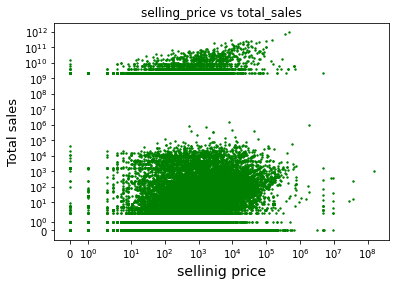

In [12]:
import matplotlib.pyplot as plt
df_subset = df_avg_assetView
follower_count = list(df_avg_assetView['followers_count'])
selling_price = list(df_avg_assetView['avg_selling_price'])
listing_price = list(df_avg_assetView['avg_listing_price'])
total_sales = list(df_avg_assetView['total_sales_y'])
market_cap = list(df_avg_assetView['market_cap_x'])
supply =list(df_avg_assetView['total_supply_y'])
owners =list(df_avg_assetView['num_owners_y'])


#plt.axis([0, 100000, 0, 100000])
plt.xlabel('sellinig price', fontsize=14)
plt.ylabel('Total sales', fontsize=13)
plt.scatter(follower_count, total_sales, s = 2, c='green')
plt.title('selling_price vs total_sales')
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
plt.show()


62997


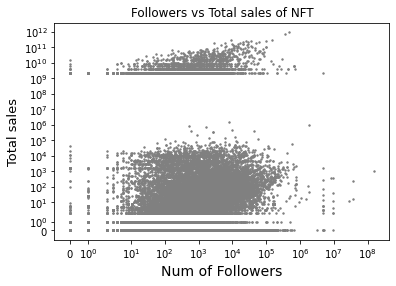

In [14]:
import matplotlib.pyplot as plt
df_subset = df_avg_assetView
follower_count = list(df_avg_assetView['followers_count'])
selling_price = list(df_avg_assetView['avg_selling_price'])
listing_price = list(df_avg_assetView['avg_listing_price'])
total_sales = list(df_avg_assetView['total_sales_y'])

print(len(follower_count))

#plt.axis([0, 100000, 0, 100000])
plt.xlabel('Num of Followers', fontsize=14)
plt.ylabel('Total sales', fontsize=13)
plt.scatter(follower_count, total_sales, s = 2, c='0.5')
plt.title('Followers vs Total sales of NFT')
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
plt.show()

In [ ]:
pip install scipy

In [14]:
from scipy import stats
correlation, p_value = stats.spearmanr(market_cap, supply)
print(correlation, p_value)

0.5825304058186933 0.0


x: total sale y: selling price = corr:0.5426 p_value=0.0
x: follower_count y: total_sales = corr: 0.2856 p_value = 0.0
x: follower_count y: owners = corr: 0.2434 p_value = 0.0
x: follower_count y: selling_price = corr: 0.1997p-value= 0.0
x: market_cap y: selling_price = corr: 0.2832 p-value= 0.0
x: market_cap y: supply = corr: 0.5825 p-value = 0.0

In [16]:
TWITTER_DF = pd.read_csv('Twitter_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
TWITTER_DF.drop(['avg_selling_price'], axis=1, inplace=True)
TWITTER_COLUMNS = list(TWITTER_DF.columns)
TWITTER_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,...,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,...,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,...,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,...,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,...,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x0076b645920716be2a...
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,...,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,329.00,329.0,178,480,264.00,264.0,229,299,3.5,3.5,...,0,1,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0xfe21b0a8df3308c61c...
62993,180.00,180.0,180,180,157.00,157.0,157,157,1.0,1.0,...,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0xfe734dd914984b6442...
62994,494.00,494.0,494,494,751.00,751.0,751,751,8.0,8.0,...,0,0,1.25,1.0,1,2,0,0,4,https://opensea.io/assets/0xff9315c2c4c0208edb...
62995,1828.00,1828.0,1828,1828,30.00,30.0,30,30,15.0,15.0,...,0,0,2.00,2.0,2,2,0,0,1,https://opensea.io/assets/0xff9315c2c4c0208edb...


In [17]:
mini_df = TWITTER_DF.loc[: , ['has_nft', 'has_crypto','permalink']]
mini_df

,has_nft,has_crypto,permalink
0,0,0,https://opensea.io/assets/0x005c1cfc36e5ec711b...
1,0,0,https://opensea.io/assets/0x005c1cfc36e5ec711b...
2,0,0,https://opensea.io/assets/0x005efb3633638dd0dd...
3,0,0,https://opensea.io/assets/0x0076b645920716be2a...
4,0,0,https://opensea.io/assets/0x00c719960bfcb4286d...
...,...,...,...
62992,0,0,https://opensea.io/assets/0xfe21b0a8df3308c61c...
62993,0,0,https://opensea.io/assets/0xfe734dd914984b6442...
62994,0,0,https://opensea.io/assets/0xff9315c2c4c0208edb...
62995,0,0,https://opensea.io/assets/0xff9315c2c4c0208edb...


In [18]:
OPENSEA_DF = pd.read_csv('Opensea_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
OPENSEA_DF.drop(['Unnamed: 0'], axis=1, inplace=True)
OPENSEA_COLUMNS = list(OPENSEA_DF.columns)
OPENSEA_DF

,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,supports_wyvern,numEvents,transfer,successful,...,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,https://opensea.io/assets/0xc7e5e9434f4a71e6db...,0.0,0.0,0.0,0,0.0,1,1,1,0,...,2.896410e+02,0,1,0,971,2,1,2021,0,0
1,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,...,0.000000e+00,0,0,0,7291,2,1,2021,0,0
2,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,...,0.000000e+00,0,0,0,7291,3,1,2021,0,0
3,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,6,1,0,...,3.827521e+15,0,1,0,11248,3,1,2021,0,0
4,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,2,2,0,...,2.838661e+15,0,1,0,11248,2,1,2021,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,3,1,0,...,0.000000e+00,0,0,0,11581,28,3,2021,0,0
62993,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,4,1,0,...,0.000000e+00,0,0,0,9903,30,3,2021,0,0
62994,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,...,0.000000e+00,0,0,0,14493,24,3,2021,0,0
62995,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,...,0.000000e+00,0,0,0,14493,24,3,2021,0,0


In [19]:
mini_df2 = OPENSEA_DF.loc[: , ['permalink','sale_label', 'creation_month','is_subject_to_whitelist','is_collection_verified','supports_wyvern', 'is_presale']]
mini_df2

,permalink,sale_label,creation_month,is_subject_to_whitelist,is_collection_verified,supports_wyvern,is_presale
0,https://opensea.io/assets/0xc7e5e9434f4a71e6db...,0,1,0,1,1,0
1,https://opensea.io/assets/0x495f947276749ce646...,0,1,0,0,1,1
2,https://opensea.io/assets/0x495f947276749ce646...,0,1,0,0,1,1
3,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0,1,0,1,1,0
4,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0,1,0,1,1,0
...,...,...,...,...,...,...,...
62992,https://opensea.io/assets/0x495f947276749ce646...,0,3,0,0,1,1
62993,https://opensea.io/assets/0x495f947276749ce646...,0,3,0,0,1,1
62994,https://opensea.io/assets/0x495f947276749ce646...,0,3,0,0,1,1
62995,https://opensea.io/assets/0x495f947276749ce646...,0,3,0,0,1,1


In [30]:
FINAL_DF = mini_df.merge(mini_df2, on='permalink')
FINAL_DF.drop(['permalink'], axis=1, inplace=True)
FINAL_DF

,has_nft,has_crypto,sale_label,creation_month,is_subject_to_whitelist,is_collection_verified,supports_wyvern,is_presale
0,0,0,0,3,0,1,1,0
1,0,0,0,3,0,1,1,0
2,0,0,1,1,0,1,1,0
3,0,0,0,3,0,0,1,0
4,0,0,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...
62992,0,0,0,3,0,0,1,0
62993,0,0,0,3,0,0,1,0
62994,0,0,0,1,0,0,1,0
62995,0,0,0,1,0,0,1,0


In [21]:
# FINAL_DF = TWITTER_DF.merge(OPENSEA_DF, on='permalink')
# FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,...,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,...,0.000000,0,1,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,...,0.000000,0,1,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,...,0.000000,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,...,0.000000,0,0,0,12410,26,3,2021,0,0
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,...,0.000000,0,0,0,7921,17,3,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,329.00,329.0,178,480,264.00,264.0,229,299,3.5,3.5,...,0.000000,0,0,0,5364,25,3,2021,0,0
62993,180.00,180.0,180,180,157.00,157.0,157,157,1.0,1.0,...,0.000000,0,0,0,6527,21,3,2021,0,0
62994,494.00,494.0,494,494,751.00,751.0,751,751,8.0,8.0,...,149.600000,0,0,0,4496,16,1,2021,0,0
62995,1828.00,1828.0,1828,1828,30.00,30.0,30,30,15.0,15.0,...,149.600000,0,0,0,4496,28,1,2021,0,0


In [31]:
cat_vars=['has_nft','has_crypto','creation_month','is_subject_to_whitelist','is_collection_verified','supports_wyvern','is_presale']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(FINAL_DF[var], prefix=var)
    data1=FINAL_DF.join(cat_list)
    FINAL_DF=data1
cat_vars=['has_nft','has_crypto','creation_month','is_subject_to_whitelist','is_collection_verified','supports_wyvern','is_presale']
data_vars=FINAL_DF.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [32]:
data_final=FINAL_DF[to_keep]
data_final.columns.values

array(['sale_label', 'has_nft_0', 'has_nft_1', 'has_crypto_0',
       'has_crypto_1', 'creation_month_1', 'creation_month_2',
       'creation_month_3', 'creation_month_4',
       'is_subject_to_whitelist_0', 'is_collection_verified_0',
       'is_collection_verified_1', 'supports_wyvern_0',
       'supports_wyvern_1', 'is_presale_0', 'is_presale_1'], dtype=object)

In [24]:
# data_final['sale_label'] = FINAL_DF['sale_label']
# data_final.columns.values

In [33]:
len(to_keep)

16

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:

X = data_final.loc[:, data_final.columns != 'sale_label']
type(X)

pandas.core.frame.DataFrame

In [36]:


X = data_final.loc[:, data_final.columns != 'sale_label']
y = data_final.loc[:, data_final.columns == 'sale_label']
X=X.astype('int')
y=y.astype('int')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['sale_label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['sale_label']==0]))
print("Number of subscription",len(os_data_y[os_data_y['sale_label']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['sale_label']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['sale_label']==1])/len(os_data_X))

length of oversampled data is  67296
Number of no subscription in oversampled data 33648
Number of subscription 33648
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [149]:
data_final_vars=data_final.columns.values.tolist()
y=['sale_label']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step =20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False  True False False False False  True
  True False  True]
[2 1 1 2 1 2 1 2 2 2 2 1 1 2 1]


In [37]:
cols=['has_nft_1','has_crypto_0','is_presale_1'] 
X=os_data_X[cols]
y=os_data_y['sale_label']
y

0        0
1        0
2        0
3        0
4        1
        ..
67291    1
67292    1
67293    1
67294    1
67295    1
Name: sale_label, Length: 67296, dtype: int64

In [38]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.5 MB/s eta 0:00:0000:0100:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.682389
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.016     
Dependent Variable: sale_label       AIC:              91850.1300
Date:               2022-10-28 14:47 BIC:              91877.4806
No. Observations:   67296            Log-Likelihood:   -45922.   
Df Model:           2                LL-Null:          -46646.   
Df Residuals:       67293            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
has_nft_1         0.4826   0.0205  23.5889 0.0000  0.4425  0.5227
has_crypto_0      0.3698   0.0162  22.7722 0.0000  0.3380  0.4016


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.58


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7681 2244]
 [6261 4003]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      9925
           1       0.64      0.39      0.48     10264

    accuracy                           0.58     20189
   macro avg       0.60      0.58      0.56     20189
weighted avg       0.60      0.58      0.56     20189



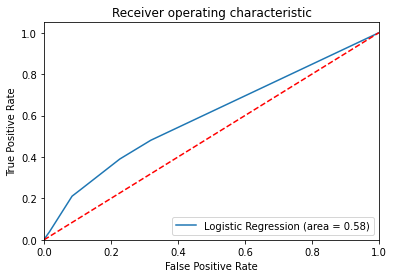

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [45]:
above_0_df = FINAL_DF[FINAL_DF['price_label'] > 0]
above_0_df['price_label'] = above_0_df['price_label'] - 1
above_0_df.index = range(len(above_0_df))
above_0_df

KeyError: 'price_label'

In [46]:
from scipy import stats
correlation, p_value = stats.spearmanr(follower_count, total_sales)
print(correlation, p_value)

0.2856753430983039 0.0


In [47]:
from scipy import stats
import numpy as np
correlation, p_value = stats.spearmanr(np.log(np.nan_to_num( [x+0.1 for x in follower_count], nan=0.1)), np.log(np.nan_to_num([x+0.1 for x in selling_price], nan=0.1)))
print(correlation, p_value)

0.1997937043532909 0.0


In [12]:
for i in (data.columns):
    print(i)

user_id
user_id_str
name
screen_name
location
user_description
url
entities
protected
followers_count
friends_count
listed_count
created_at_user
favourites_count
utc_offset
time_zone
geo_enabled
verified
statuses_count
lang
status
contributors_enabled
is_translator
is_translation_enabled
profile_background_color
profile_background_image_url
profile_background_image_url_https
profile_background_tile
profile_image_url
profile_image_url_https
profile_banner_url
profile_link_color
profile_sidebar_border_color
profile_sidebar_fill_color
profile_text_color
profile_use_background_image
has_extended_profile
default_profile
default_profile_image
following
follow_request_sent
notifications
translator_type
tweet_id
conversation_id
created_at_tweet
date
timezone
place
tweet
language
hashtags
cashtags
day
hour
link
urls
photos
video
thumbnail
retweet
nlikes
nreplies
nretweets
quote_url
search
near
geo
source
user_rt_id
user_rt
retweet_id
reply_to
retweet_date
translate
trans_src
trans_dest
token_id

In [48]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [49]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]


In [50]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [51]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [52]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [53]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [54]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [56]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [58]:
clf.predict([[3, 5, 4, 2]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [59]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [61]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.490750
petal width (cm)     0.368599
sepal length (cm)    0.117391
sepal width (cm)     0.023260
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


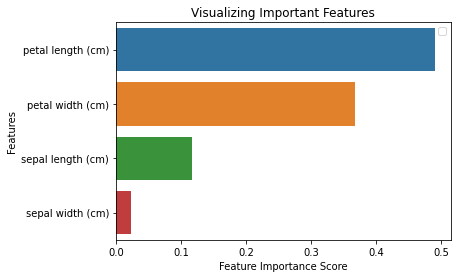

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [184]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [64]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [65]:
FINAL_DF = TWITTER_DF.merge(OPENSEA_DF, on='permalink')
FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,...,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,...,0.000000,0,1,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,...,0.000000,0,1,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,...,0.000000,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,...,0.000000,0,0,0,12410,26,3,2021,0,0
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,...,0.000000,0,0,0,7921,17,3,2021,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,329.00,329.0,178,480,264.00,264.0,229,299,3.5,3.5,...,0.000000,0,0,0,5364,25,3,2021,0,0
62993,180.00,180.0,180,180,157.00,157.0,157,157,1.0,1.0,...,0.000000,0,0,0,6527,21,3,2021,0,0
62994,494.00,494.0,494,494,751.00,751.0,751,751,8.0,8.0,...,149.600000,0,0,0,4496,16,1,2021,0,0
62995,1828.00,1828.0,1828,1828,30.00,30.0,30,30,15.0,15.0,...,149.600000,0,0,0,4496,28,1,2021,0,0


In [76]:
from sklearn.model_selection import train_test_split

X = FINAL_DF[['followers_count_mean', 'total_sales','listed_count_median', 'friends_count_mean', 'market_cap','total_supply','number_of_tweets','favourites_count_mean','statuses_count_mean']]
y=FINAL_DF['price_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [77]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)



In [78]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8280952380952381


In [80]:
clf.predict([[3500, 200,550, 200, 1000,500,300,300,300]])


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [81]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=1)

In [84]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['followers_count_mean', 'total_sales','listed_count_median', 'friends_count_mean', 'market_cap','total_supply','number_of_tweets','favourites_count_mean','statuses_count_mean']).sort_values(ascending=False)
feature_imp

total_sales              0.279158
total_supply             0.144714
followers_count_mean     0.095420
number_of_tweets         0.088464
friends_count_mean       0.088321
favourites_count_mean    0.086553
statuses_count_mean      0.084223
market_cap               0.072963
listed_count_median      0.060183
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


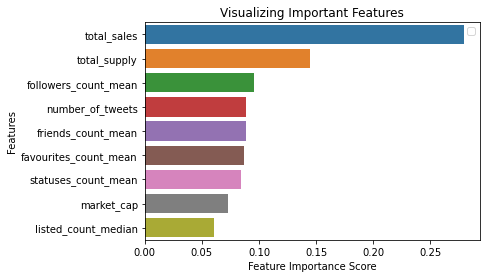

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [134]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X = FINAL_DF[['followers_count_mean', 'total_sales', 'friends_count_mean', 'market_cap','total_supply','number_of_tweets','favourites_count_mean','statuses_count_mean']]
y=FINAL_DF['price_label']                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [159]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42,)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8269309265726337


In [148]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [149]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [152]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [153]:
grid_search.best_score_

0.8213131974965168

In [154]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

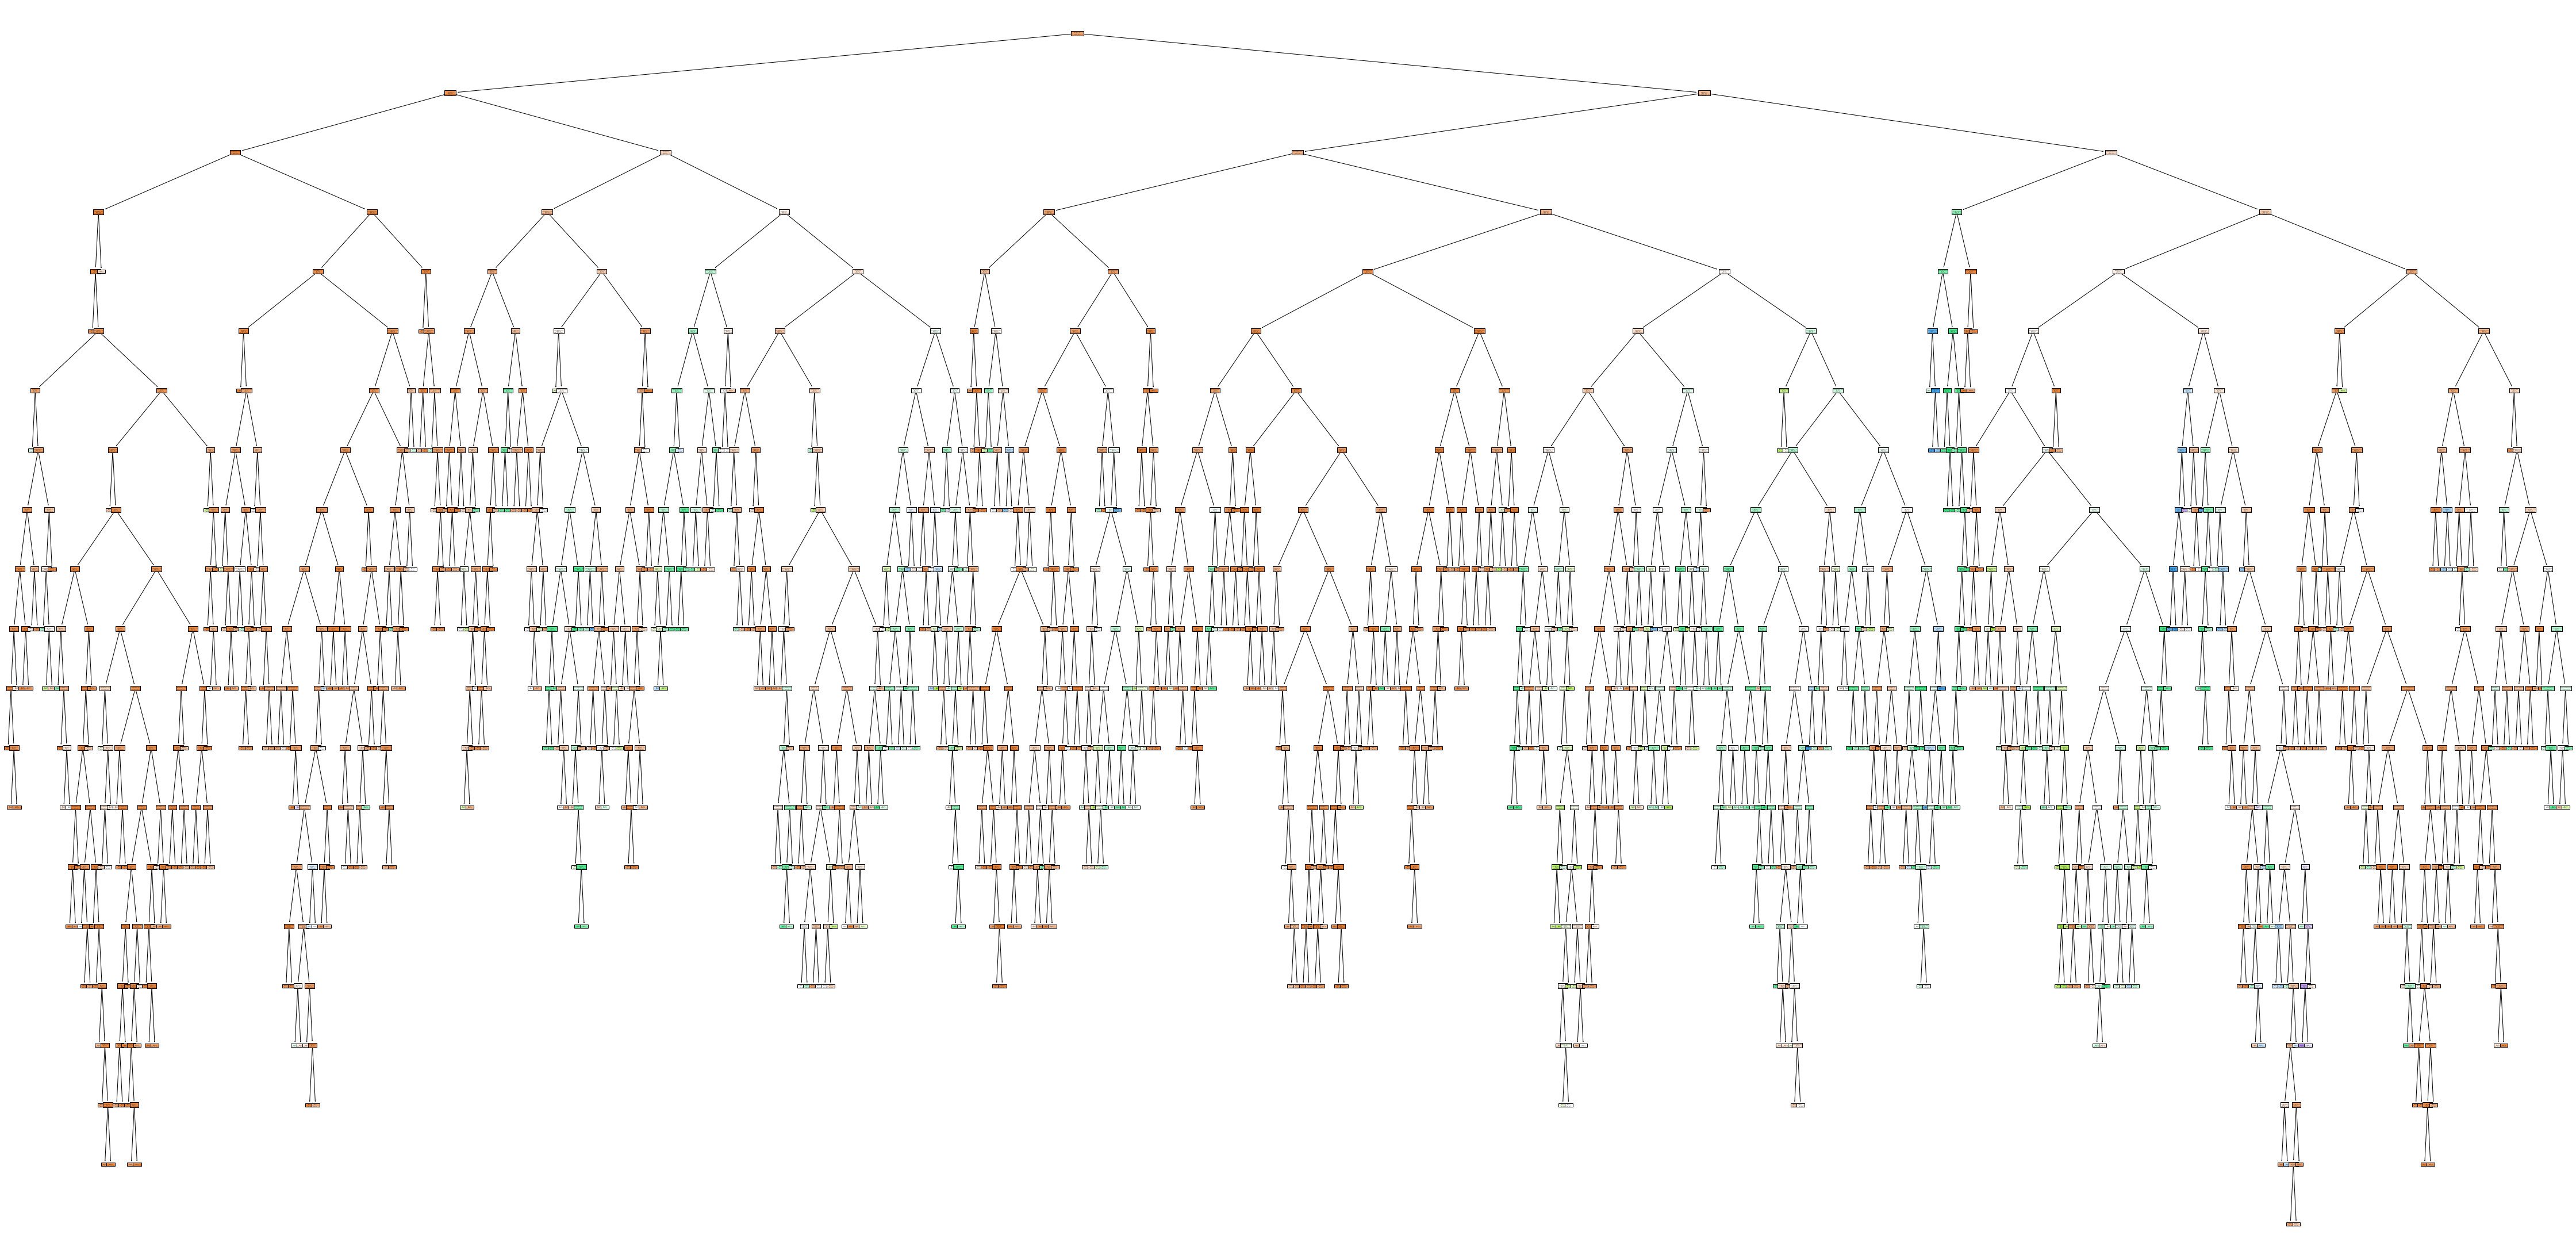

In [161]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[8], feature_names = X.columns,class_names=['Price', "Price2","Price2","Price2","Price2"],filled=True);

In [99]:
X = FINAL_DF[['followers_count_mean', 'total_sales', 'friends_count_mean', 'market_cap','total_supply','number_of_tweets','favourites_count_mean','statuses_count_mean']]
y=FINAL_DF['average_price'] 
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [104]:

Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but RandomForestRegressor is expecting 8 features as input.

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)


In [106]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [108]:
from sklearn.metrics import mean_squared_error # for calculating the cost function

In [109]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.096


In [119]:
model.predict([[4000, 1000, 2000, 2000,300,10,100,100]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.65155925])